In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib nbagg
import seaborn as sns

In [46]:
train=pd.read_csv('C://Users//Ankit Gokhroo//Desktop//black//train.csv')

In [47]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [48]:
test=pd.read_csv('C://Users//Ankit Gokhroo//Desktop//black//test.csv')

In [49]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [50]:
train.shape,test.shape

((550068, 12), (233599, 11))

In [51]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [52]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [53]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [54]:
train['Product_Category_2'].fillna(train['Product_Category_2'].mean(),inplace=True)
train['Product_Category_3'].fillna(train['Product_Category_3'].mean(),inplace=True)

In [55]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [56]:
# finding frequency of male and female customers
train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [57]:
# finding the maximum purchase in both male and female

train.groupby('Gender')['Purchase'].max()

Gender
F    23959
M    23961
Name: Purchase, dtype: int64

In [58]:
# finding the minimum purchase in both male and female

train.groupby('Gender')['Purchase'].min()

Gender
F    12
M    12
Name: Purchase, dtype: int64

In [143]:
# checking dependency of gender on purchase
x=train.groupby('Gender')['Purchase'].mean()
x=pd.DataFrame(x)
x

,Purchase
Gender,
F,8734.565765
M,9437.526040


In [144]:
# checing the dependency of age attribute with purchasing power
x=train.groupby('Age')['Purchase'].mean()
x=pd.DataFrame(x)
x

,Purchase
Age,
0-17,8933.464640
18-25,9169.663606
26-35,9252.690633
36-45,9331.350695
46-50,9208.625697
51-55,9534.808031
55+,9336.280459


In [145]:
# checking the dependency of cities where customer live with the purchasing power
x=train.groupby('City_Category')['Purchase'].mean()
x=pd.DataFrame(x)
x

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


<IPython.core.display.Javascript object>


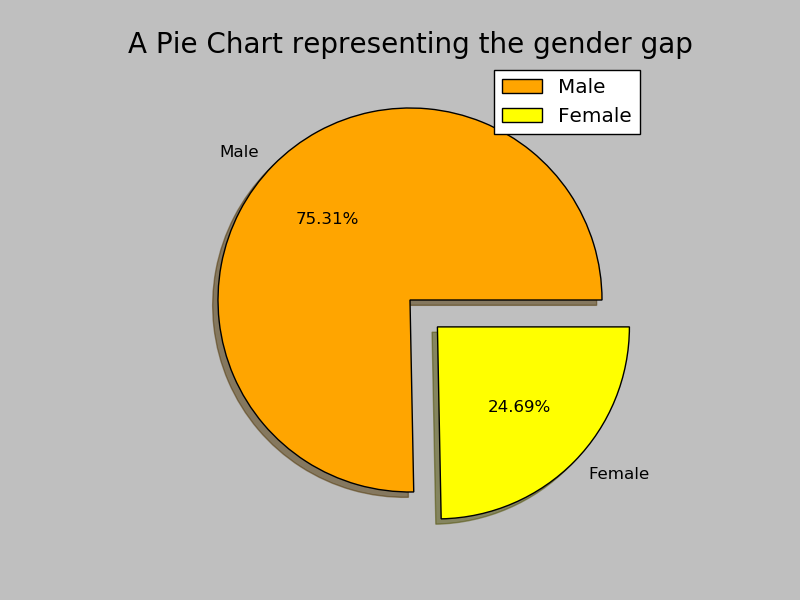

In [146]:
# pie chart 

count = train['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['orange', 'yellow']
explode = [0, 0.2]

plt.rcParams['figure.figsize'] = (20, 20)
plt.style.use('_classic_test')
plt.pie(count, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


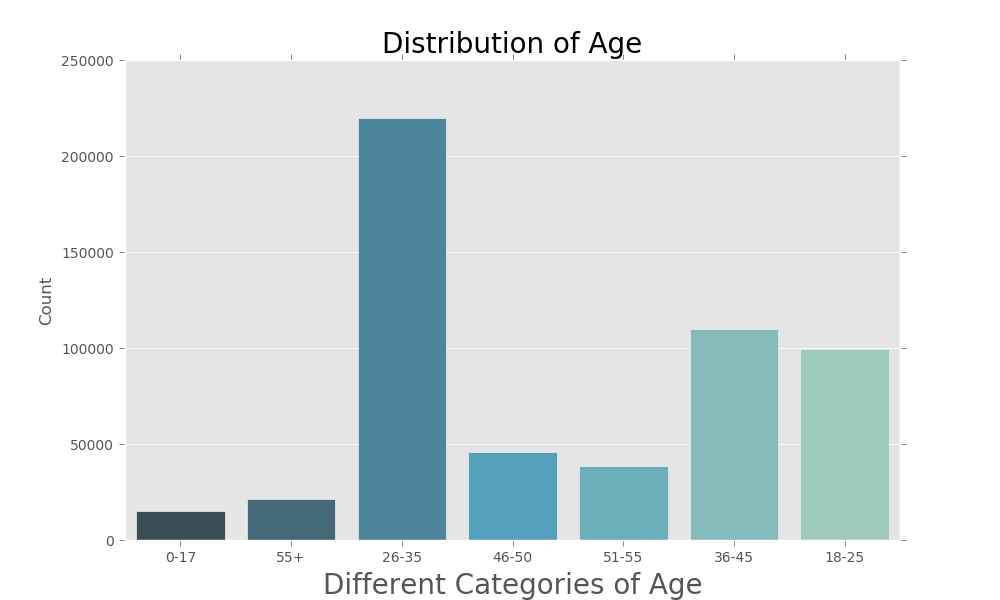

In [147]:
# visualizing the age of customers

plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

sns.countplot(train['Age'], palette = 'GnBu_d')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Different Categories of Age', fontsize = 20)
plt.ylabel('Count')
plt.show()


In [148]:

print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


<IPython.core.display.Javascript object>


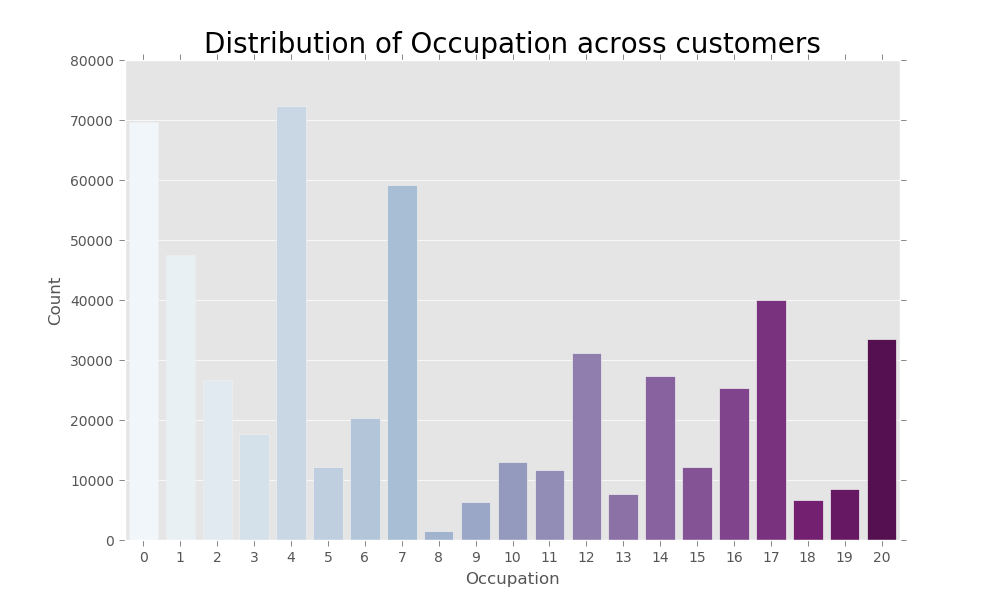

In [149]:
# visualizing the occupation of customers

plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('ggplot')

sns.countplot(train['Occupation'], palette = 'BuPu')
plt.title('Distribution of Occupation across customers', fontsize = 20)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()


<IPython.core.display.Javascript object>


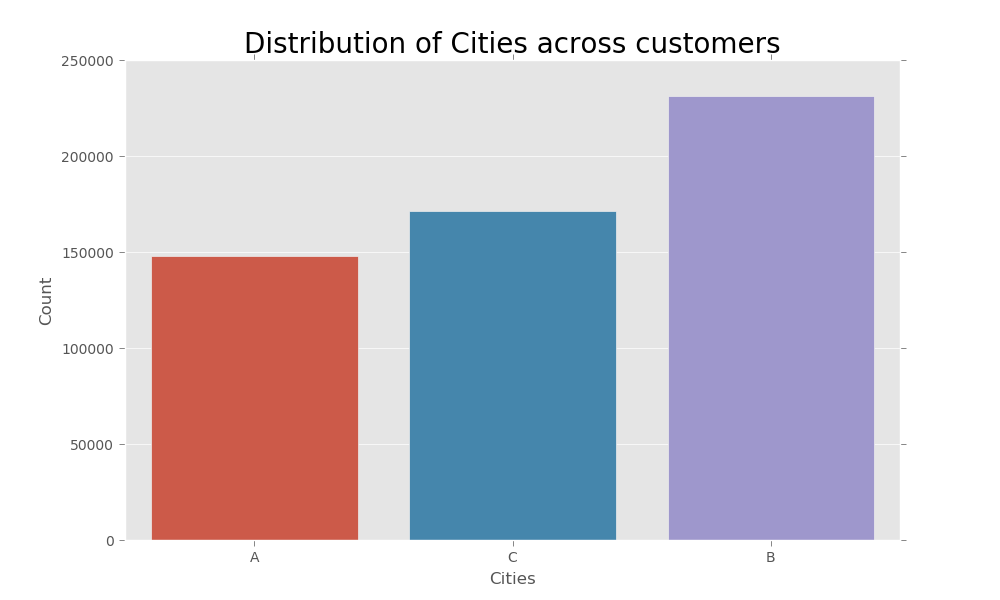

In [150]:

# visulaizing the cities the customers are from

sns.countplot(train['City_Category'])#, palette = 'colorblind')
plt.title('Distribution of Cities across customers', fontsize = 20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

<IPython.core.display.Javascript object>


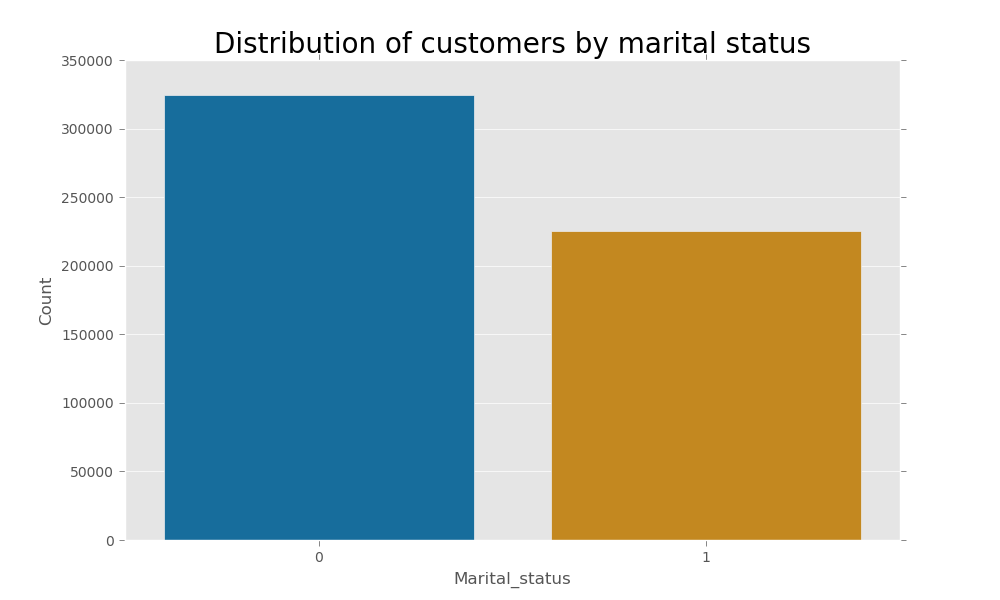

In [151]:
# visulaizing the cities the customers are from

sns.countplot(train['Marital_Status'], palette = 'colorblind')
plt.title('Distribution of customers by marital status', fontsize = 20)
plt.xlabel('Marital_status')
plt.ylabel('Count')
plt.show()

In [152]:
train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [59]:

# we need to label the 4+ to 5 to visualize the stay of customers in a city
train['Stay_In_Current_City_Years'].replace('4+', 4, inplace = True)

<IPython.core.display.Javascript object>


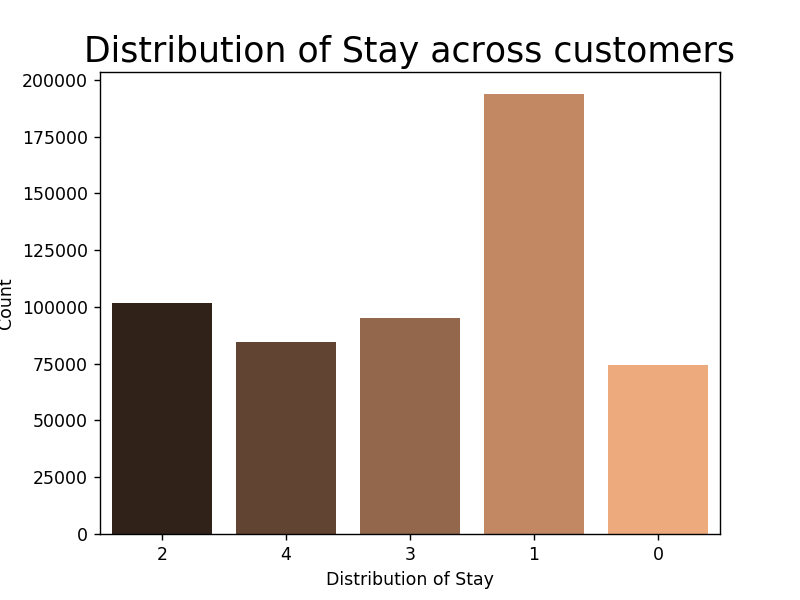

In [60]:

# visualizing the stay in current years


sns.countplot(train['Stay_In_Current_City_Years'], palette = 'copper')
plt.title('Distribution of Stay across customers', fontsize = 20)
plt.xlabel('Distribution of Stay')
plt.ylabel('Count')
plt.show()

<IPython.core.display.Javascript object>


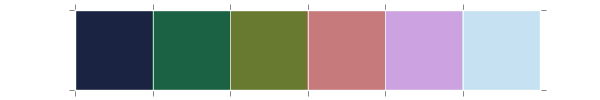

<IPython.core.display.Javascript object>


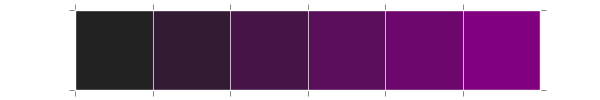

<IPython.core.display.Javascript object>


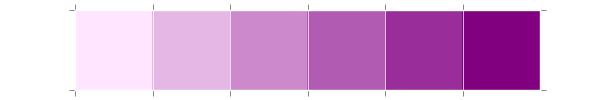

In [89]:
sns.palplot(sns.color_palette("cubehelix"))
sns.palplot(sns.dark_palette("purple"))
sns.palplot(sns.light_palette("purple"))

In [14]:
train['Product_Category_1'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [15]:
train['Product_Category_2'].value_counts()

9.842329     173638
8.000000      64088
14.000000     55108
2.000000      49217
16.000000     43255
15.000000     37855
5.000000      26235
4.000000      25677
6.000000      16466
11.000000     14134
17.000000     13320
13.000000     10531
9.000000       5693
12.000000      5528
10.000000      3043
3.000000       2884
18.000000      2770
7.000000        626
Name: Product_Category_2, dtype: int64

In [16]:
train['Product_Category_3'].value_counts()

12.668243    383247
16.000000     32636
15.000000     28013
14.000000     18428
17.000000     16702
5.000000      16658
8.000000      12562
9.000000      11579
12.000000      9246
13.000000      5459
6.000000       4890
18.000000      4629
4.000000       1875
11.000000      1805
10.000000      1726
3.000000        613
Name: Product_Category_3, dtype: int64

<IPython.core.display.Javascript object>


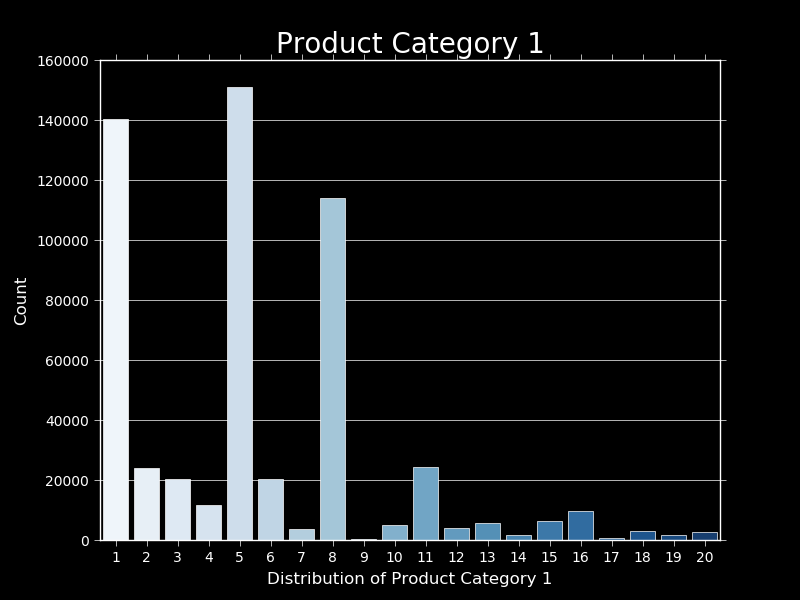

In [101]:
# visualizing the different product categories

plt.rcParams['figure.figsize'] = (8,6)
plt.style.use('dark_background')


sns.countplot(train['Product_Category_1'], palette = 'Blues')
plt.title('Product Category 1', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.show()

<IPython.core.display.Javascript object>


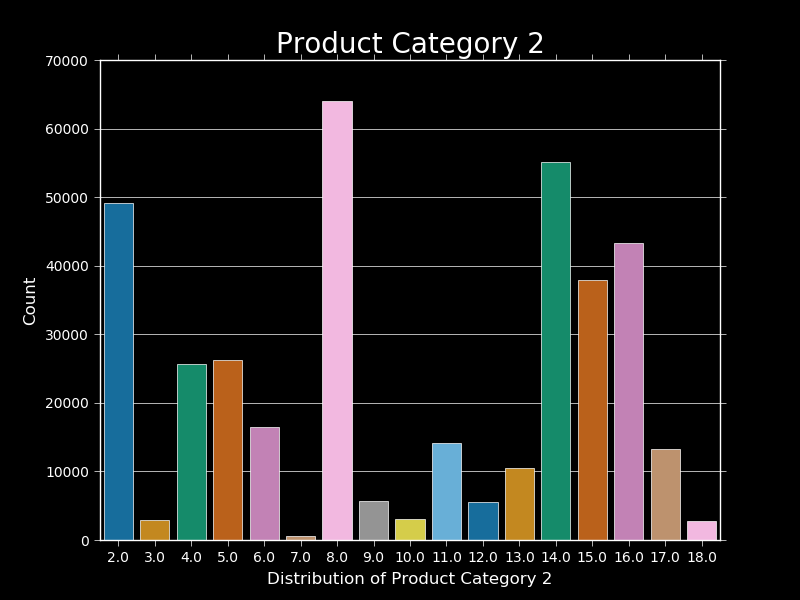

In [103]:
# visualizing the different product categories

plt.rcParams['figure.figsize'] = (8,6)
plt.style.use('dark_background')

sns.countplot(train['Product_Category_2'], palette = 'colorblind')
plt.title('Product Category 2', fontsize = 20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.show()

<IPython.core.display.Javascript object>


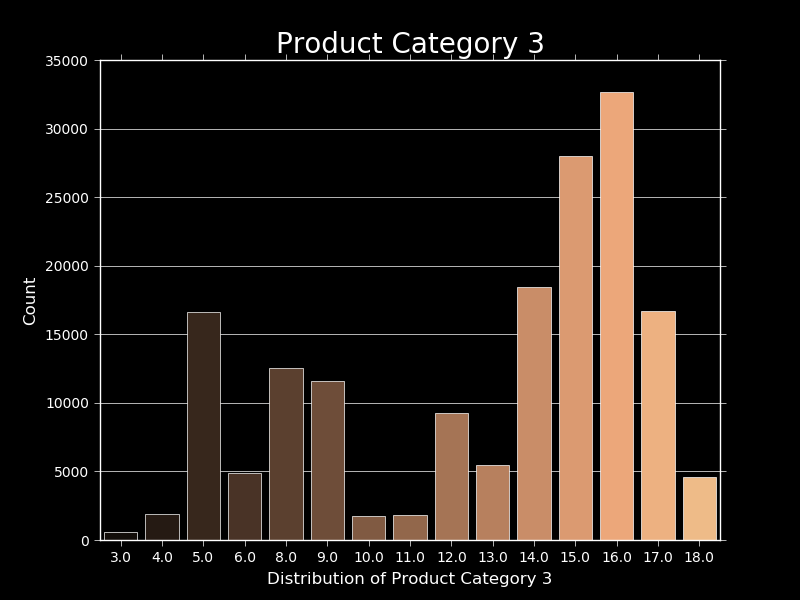

In [104]:
# visualizing the different product categories

plt.rcParams['figure.figsize'] = (8,6)
plt.style.use('dark_background')


sns.countplot(train['Product_Category_3'], palette = 'copper')
plt.title('Product Category 3', fontsize = 20)
plt.xlabel('Distribution of Product Category 3')
plt.ylabel('Count')

plt.show()

<IPython.core.display.Javascript object>


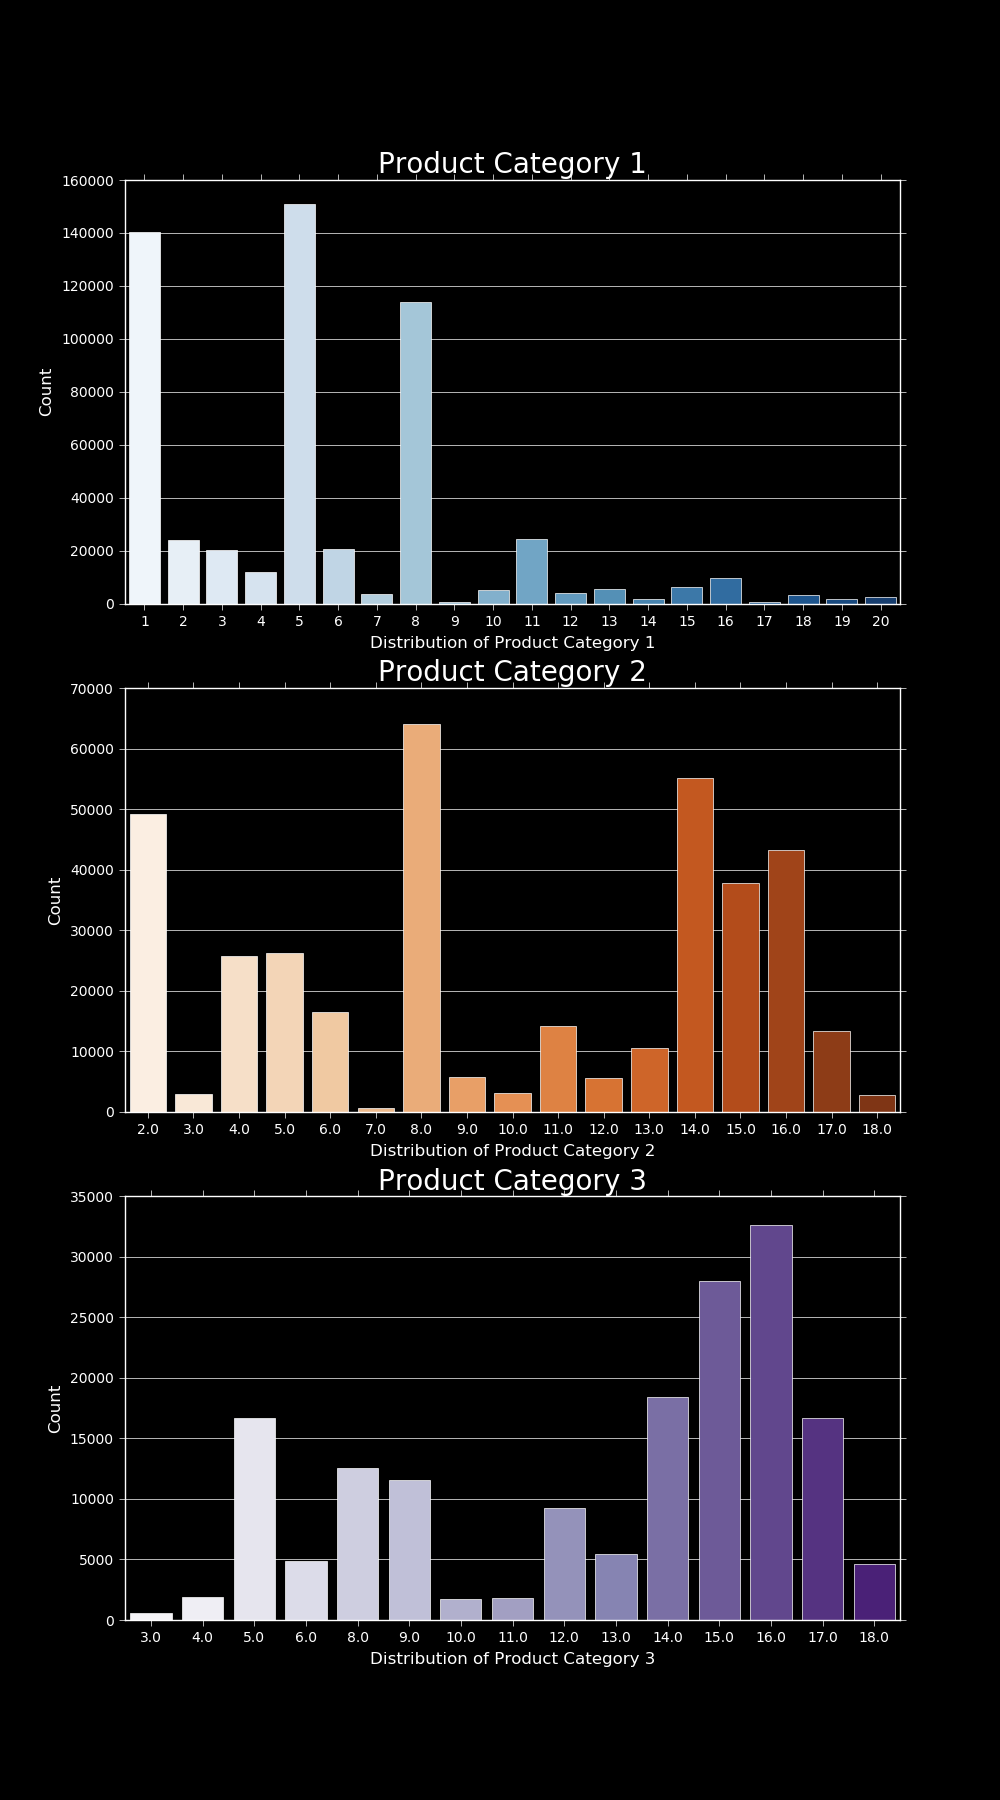

In [109]:
# visualizing the different product categories

plt.rcParams['figure.figsize'] = (10,18)
plt.style.use('dark_background')

plt.subplot(3, 1, 1)
sns.countplot(train['Product_Category_1'], palette = 'Blues')
plt.title('Product Category 1', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(3, 1, 2)
sns.countplot(train['Product_Category_2'], palette = 'Oranges')
plt.title('Product Category 2', fontsize = 20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.subplot(3, 1, 3)
sns.countplot(train['Product_Category_3'], palette = 'Purples')
plt.title('Product Category 3', fontsize = 20)
plt.xlabel('Distribution of Product Category 3')
plt.ylabel('Count')

plt.show()


<IPython.core.display.Javascript object>


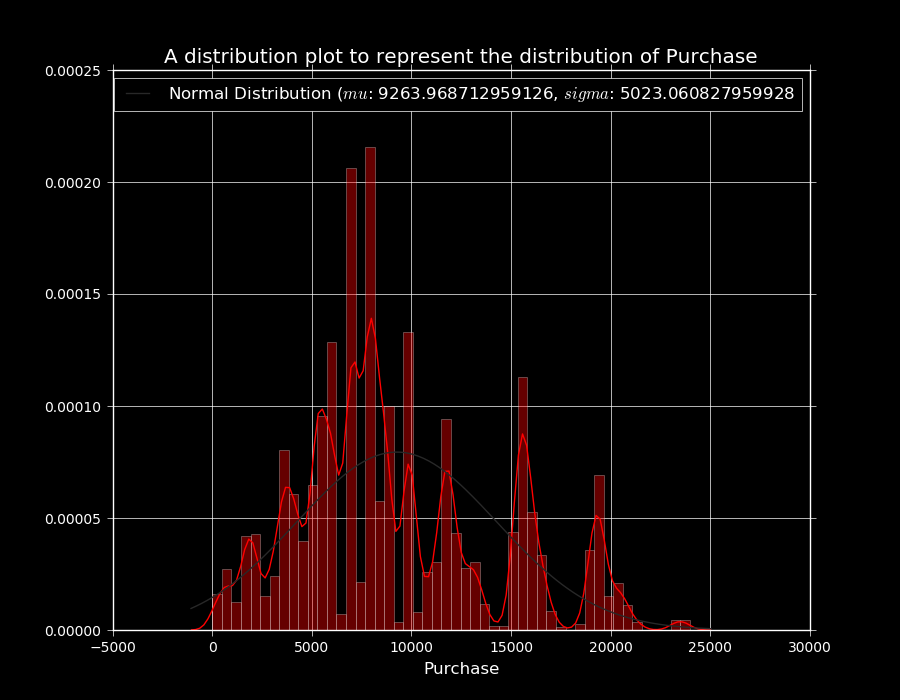

The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


In [115]:
# visualizing the purchase attribute which is our target variable

import warnings
warnings.filterwarnings('ignore')

# importing important libraries
from scipy import stats
from scipy.stats import norm

# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (9, 7)
sns.distplot(train['Purchase'], color = 'red', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(train['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

<IPython.core.display.Javascript object>


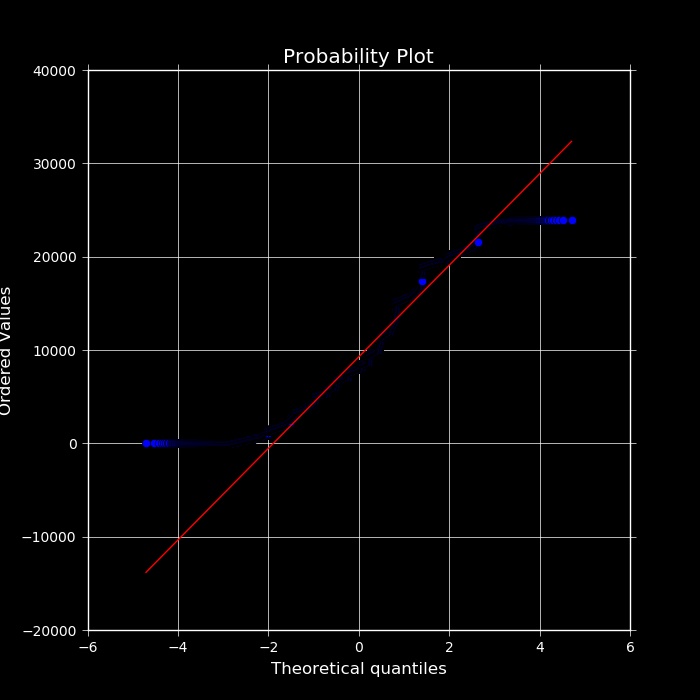

In [111]:
# plotting the QQplot
stats.probplot(train['Purchase'], plot = plt)
plt.show()


# Data Preprocessing

In [61]:

# removing unwanted columns

# saving the attributes User_ID and Product_ID before deleting them
User_ID = train['User_ID']
Product_ID = train['Product_ID']

train = train.drop(['User_ID', 'Product_ID'], axis = 1)



In [62]:
# checking the new shape of data
train.shape

(550068, 10)

In [63]:
# label encoding

from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()

train['Gender'] = l.fit_transform(train['Gender'])
train['City_Category'] = l.fit_transform(train['City_Category'])
train['Age'] = l.fit_transform(train['Age'])

In [64]:
# splitting the data into dependent and independents sets

y = train['Purchase']

# now removing the purchase column from the dataset
train = train.drop(['Purchase'], axis = 1)

x = train



In [65]:
# checking the shapes of x and y
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (550068, 9)
Shape of y:  (550068,)


In [66]:
# splitting into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)



In [67]:
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (385047, 9)
Shape of x_test:  (165021, 9)
Shape of y_train:  (385047,)
Shape of y_test:  (165021,)


In [68]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Modelling

# 1.Ridge Regression

In [69]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = Ridge()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


RMSE Error: 4698.056053972826
R2 Score: 0.12937881032791088


# 2. Elastic Net Regression

In [70]:

from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


RMSE Error: 4731.862287697157
R2 Score: 0.11680411224803411


# 3. Lasso Regression

In [71]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4698.062880210025
R2 Score: 0.12937628031507153


# 4. Gradient Boosting Regression

In [72]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


RMSE Error: 2927.655994316925
R2 Score: 0.6619095258800837


# Comparison of R2 Score

<IPython.core.display.Javascript object>


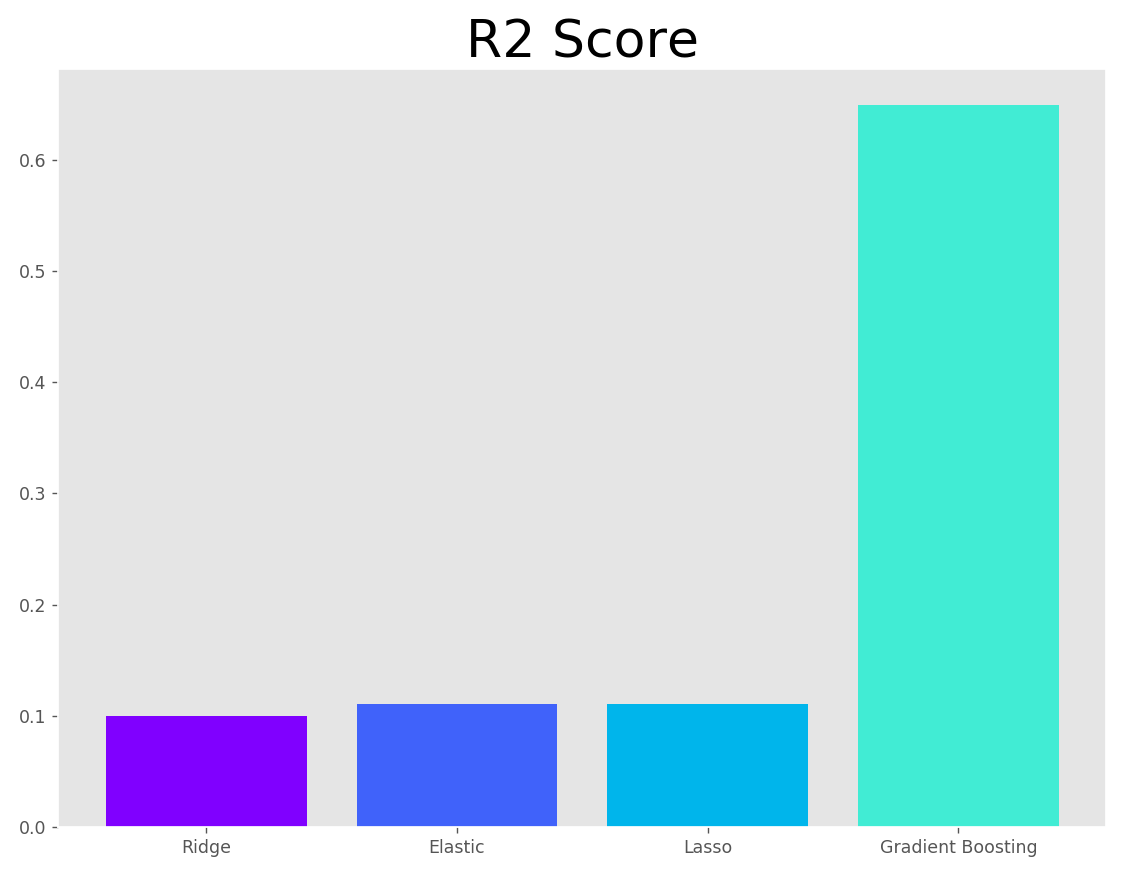

In [73]:
r2_score = np.array([0.1, 0.11, 0.11, 0.65])
labels = np.array(['Ridge', 'Elastic', 'Lasso', 'Gradient Boosting'])
indices = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (9,7)
plt.bar(range(len(indices)), r2_score[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('R2 Score', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

In [74]:
y_pred

array([12955.50492509, 12684.72669438,  7728.60253702, ...,
       10889.33947415, 16367.89961135,  4717.30656745])

In [75]:
y_test.head()

483664     9780
179125    12019
148091     9754
384965     1427
197871     8645
Name: Purchase, dtype: int64

In [76]:
predictions=[]
for i in range(len(y_pred)):
    predictions.append(y_pred[i])

In [77]:
predictions

[12955.504925086707,
 12684.72669437738,
 7728.602537017646,
 3088.9475983378065,
 6411.71105562155,
 6800.353831377741,
 6436.071315405334,
 14366.701311448725,
 6274.545635548522,
 4663.273335227507,
 11817.341997256483,
 6285.879543801014,
 7457.888870005339,
 10508.578956434048,
 7429.347283237866,
 7394.141294461148,
 6086.842563827194,
 14739.106563363634,
 10113.101112494085,
 16045.184026033025,
 6012.87363562679,
 14632.790392527226,
 6249.572872312435,
 6803.237136565052,
 7782.875993709877,
 13673.421222175297,
 5898.676618629318,
 7479.19135811646,
 5900.301320843919,
 14868.605147354418,
 6078.775562656813,
 14122.40579493588,
 10206.044853224661,
 10284.278263288636,
 7291.980795980018,
 11914.744360875713,
 7716.474614057802,
 7350.606051776798,
 7264.783830281842,
 4835.952554041084,
 7754.8937125713755,
 14256.506952804913,
 16201.227874324744,
 15732.00883002908,
 7554.821776237494,
 6292.850297442944,
 5483.727937663328,
 7187.195780730461,
 5601.604016533873,
 13723

In [79]:
df=pd.DataFrame()
df=pd.DataFrame({'Actual_cost':y_test, 'Predicted_cost':predictions})  

In [84]:
df.head(50)

,Actual_cost,Predicted_cost
483664,9780,12955.504925
179125,12019,12684.726694
148091,9754,7728.602537
384965,1427,3088.947598
197871,8645,6411.711056
94447,8626,6800.353831
300526,5273,6436.071315
109784,15340,14366.701311
111262,8801,6274.545636
461429,1545,4663.273335
